In [ ]:
import pandas as pd
import xml.etree.ElementTree as et
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/My Drive/Dataset/Assignment-files/Train-corups'

In [ ]:
dict_pos=[]
word_dict={}
prev_tag_word={}
prev_tag_wordtag={}
wordtag_dict={}
tag_freq={}
p=0.9
for root_dir,dirs,files in os.walk(path):
    for file in files:
        if file.endswith('.xml'):
            file_path=os.path.join(root_dir,file)
            tree=et.parse(file_path)
            root=tree.getroot()
            for serials in root.findall('.//s'):
                num=serials.attrib.get('n')
                sentence=''
                prev_tag=''
                for words in serials.findall('.//'):
                    if (words.tag=='w' or words.tag=='c'):
                        w=words.text
                        w=w.lower()
                        term=words.attrib.get('c5')
                        word=w.replace(' ','')
                        string=w+'_'+term+' '
                        wordtag=string[0:-1] # wordtag like .. in_PP1
                        tag_list=term.split('-')

                        # prev_tag_word dictionary that stores word--->prev_tag-->current_tag-->frequency
                        if not (word in prev_tag_word):
                          prev_tag_word[word]={}
                        if not (prev_tag in prev_tag_word[word]):
                          prev_tag_word[word][prev_tag]={}
                        if (len(tag_list)>1):
                          for i in range(len(tag_list)):
                            if not (tag_list[i] in prev_tag_word[word][prev_tag]):
                              prev_tag_word[word][prev_tag][tag_list[i]]=0
                            prev_tag_word[word][prev_tag][tag_list[i]]=(i*(1-2*p)+p)
                        else:
                          if not (tag_list[0] in prev_tag_word[word][prev_tag]):
                            prev_tag_word[word][prev_tag][tag_list[0]]=0
                          prev_tag_word[word][prev_tag][tag_list[0]]=1

                        # prev_tag_wordtag dictionary that stores wordtag--->prev_tag-->frequency
                        if not (wordtag in prev_tag_wordtag):
                          prev_tag_wordtag[wordtag]={}
                        if not (prev_tag in prev_tag_wordtag[wordtag]):  
                            prev_tag_wordtag[wordtag][prev_tag]=0
                        prev_tag_wordtag[wordtag][prev_tag]+=1

                        #word_dict stores the freq of different words
                        if not (word in word_dict):
                            word_dict[word]=0
                        word_dict[word]+=1

                        #wordtag_dict stores the freq of different wordtag combination
                        if not (wordtag in wordtag_dict):
                            wordtag_dict[wordtag]=0
                        wordtag_dict[wordtag]+=1
                        
                        #tag_freq stores the freq of different tags
                        if (len(tag_list)>1):
                          for i in range(len(tag_list)):
                              if not (tag_list[i] in tag_freq):
                                tag_freq[tag_list[i]]=0
                              tag_freq[tag_list[i]]+=(i*(1.0-2*p)+p)
                        else:
                          if not (tag_list[0] in tag_freq):
                            tag_freq[tag_list[0]]=0
                          tag_freq[tag_list[0]]+=1

                        prev_tag=tag_list[0]
                        sentence+=string
                
                #dict_pos stores sentences as a list
                dict_pos.append(sentence)    

In [ ]:
print("No of different word-tags combinations: ",len(wordtag_dict.values()))
print("No of different words: ",len(word_dict))
print("No of different tags: ",len(tag_freq))
print("No of sentences: ",len(dict_pos))
# print("Total number of words: ",sum([word_dict[x] for x in word_dict]))

No of different word-tags combinations:  291620
No of different words:  160663
No of different tags:  61
No of sentences:  485057


In [ ]:
test_path='/content/drive/My Drive/Dataset/Assignment-files/Test-corpus'

In [ ]:
test_dict_pos=[]
test_word_dict={}
test_prev_tag_word={}
test_prev_tag_wordtag={}
test_wordtag_dict={}
for root_dir,dirs,files in os.walk(test_path):
    for file in files:
        if file.endswith('.xml'):
            file_path=os.path.join(root_dir,file)
            tree=et.parse(file_path)
            root=tree.getroot()
            for serials in root.findall('.//s'):
                num=serials.attrib.get('n')
                sentence=''
                prev_tag=''
                for words in serials.findall('.//'):

                    if (words.tag=='w' or words.tag=='c'):
                        w=words.text
                        w=w.lower()
                        term=words.attrib.get('c5')
                        word=w.replace(' ','')
                        string=word+'_'+term+' '
                        wordtag=string[0:-1] # wordtag like .. in_PP1
                        tag_list=term.split('-')

                        # if not (word in test_prev_tag_word):
                        #   te
                        #     if (prev_tag in test_prev_tag_word[word]):
                        #         test_prev_tag_word[word][prev_tag]+=1
                        #     else:
                        #         test_prev_tag_word[word][prev_tag]=1
                        # else:
                        #     test_prev_tag_word[word]={}
                        #     test_prev_tag_word[word][prev_tag]=1
                            
                        # if (wordtag in test_prev_tag_wordtag):
                        #     if (prev_tag in test_prev_tag_wordtag[wordtag]):
                        #         test_prev_tag_wordtag[wordtag][prev_tag]+=1
                        #     else:
                        #         test_prev_tag_wordtag[wordtag][prev_tag]=1
                        # else:
                        #     test_prev_tag_wordtag[wordtag]={}
                        #     test_prev_tag_wordtag[wordtag][prev_tag]=1

                        #word_dict stores the freq of different words
                        #helpful in evaluating if the distribution is same
                        if not (word in test_word_dict):
                            test_word_dict[word]=1
                        test_word_dict[word]+=1
                            
                        #test_wordtag_dict stores the freq of different wordtag combination
                        if not (wordtag in test_wordtag_dict):
                            test_wordtag_dict[wordtag]=0
                        test_wordtag_dict[wordtag]+=1
                            
                        prev_tag=term
                        sentence+=string
                #test_dict_pos stores sentences as a list
                test_dict_pos.append(sentence)    

## Sentence format Preprocessing

In [ ]:
dictionary={'Sentences':dict_pos}
df=pd.DataFrame.from_dict(dictionary,orient='columns')
df.shape

(485057, 1)

In [ ]:
df.head()

,Sentences
0,labour_NN1 's _POS northern _NP0 ireland _NP0 ...
1,running _VVG-NN1 out _AVP of _PRF excuses_NN2
2,the _AT0 labour _AJ0 party_NN1 's _POS boycott...
3,it _PNP is _VBZ undemocratic _AJ0 to _TO0 gove...
4,it _PNP is _VBZ undemocratic _AJ0 to _TO0 rule...


## Analysis

In [ ]:
from collections import Counter
countr_word=Counter(word_dict)
mx_word=countr_word.most_common(10)
print('Most Common Words')
for each in mx_word:
    print(each[0],' : ',each[1])
print('')
print('Most Common Words-Tag Pair')
countr_wordtag=Counter(wordtag_dict)
mx_wordtag=countr_wordtag.most_common(10)
for each in mx_wordtag:
    print(each[0],' : ',each[1])
print('')
print('Most Common Tags')
countr_wordtag=Counter(tag_freq)
mx_wordtag=countr_wordtag.most_common(10)
for each in mx_wordtag:
    print(each[0],' : ',each[1])

Most Common Words
the  :  591223
,  :  485612
.  :  421917
of  :  287963
to  :  243930
and  :  241467
a  :  210151
in  :  186842
is  :  92247
that  :  90397

Most Common Words-Tag Pair
the _AT0  :  590679
, _PUN  :  470487
._PUN  :  421819
of _PRF  :  287158
and _CJC  :  238511
a _AT0  :  208230
in _PRP  :  172810
to _TO0  :  149380
to _PRP  :  93365
is _VBZ  :  89411

Most Common Tags
NN1  :  1476655.0
PUN  :  1016807
AT0  :  850006
PRP  :  787554.5
AJ0  :  691957.0
NN2  :  518478.5
NP0  :  480557.0
AV0  :  414188.5
PNP  :  360974
CJC  :  318509


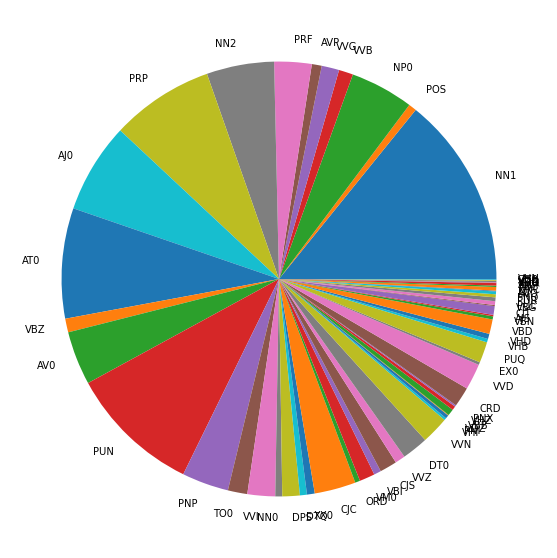

In [ ]:
import matplotlib.pyplot as plt
import PIL
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('white')
plt.pie([tag_freq[key] for key in tag_freq],labels=[key for key in tag_freq])
plt.show()

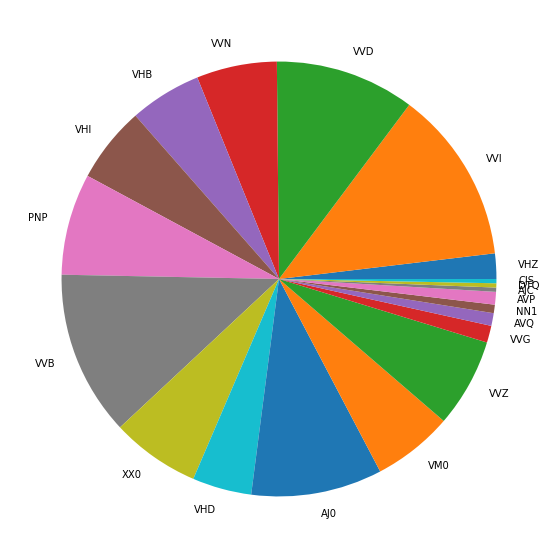

In [ ]:
word='to_TO0'
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('white')
plt.pie([prev_tag_wordtag[word][key] for key in prev_tag_wordtag[word]],labels=[key for key in prev_tag_wordtag[word]])
plt.show()

## Unigram Tagger

In [ ]:
#word_freq_dict is a dictionary of dictionary storing frequency of wordsa nd tags  words-->tags-->frequency 
word_freq_dict={}
for wordtag in wordtag_dict:
  word,tag=wordtag.split('_')
  word=word.replace(" ","")
  tag=tag.replace(" ","")
  tag_list=tag.split('-')
  if (not (word in word_freq_dict)):
    word_freq_dict[word]={}
  if (len(tag_list)>1):
    for i in range(len(tag_list)):
      if not (tag_list[i] in word_freq_dict[word]):
        word_freq_dict[word][tag_list[i]]=0
      word_freq_dict[word][tag_list[i]]+=((i*(1.0-2*p)+p)*wordtag_dict[wordtag])
  else:
    if not (tag_list[0] in word_freq_dict[word]):
        word_freq_dict[word][tag_list[0]]=0
    word_freq_dict[word][tag_list[0]]+=wordtag_dict[wordtag]

In [ ]:
#dataframe stores the word vs tag table
dataframe=pd.DataFrame.from_dict(word_freq_dict,orient='index')
dataframe=dataframe.fillna(0)
dataframe.head()

,NN1,AJ0,VVB,VVI,POS,VBZ,VHZ,VDZ,NP0,VVG,AVP,PRP,PRF,VHI,AV0,NN2,VVZ,CJS,NN0,UNC,AT0,PUN,PNP,TO0,DPS,ZZ0,DTQ,XX0,CJC,ORD,VM0,VBI,VBB,DT0,VVN,VVD,AVQ,VHB,ITJ,PNI,CRD,CJT,PNX,EX0,PUQ,VHD,VHN,VBD,VBN,AJS,AJC,VBG,PUL,PUR,PNQ,VDB,VDI,VDG,VHG,VDN,VDD
labour,1887.2,2765.0,21.8,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
membership,544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ban,340.2,0.0,26.8,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
running,253.7,145.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,983.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
campaign,1638.0,0.0,19.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(dataframe.shape)
dataframe.tail()

(160663, 61)


,NN1,AJ0,VVB,VVI,POS,VBZ,VHZ,VDZ,NP0,VVG,AVP,PRP,PRF,VHI,AV0,NN2,VVZ,CJS,NN0,UNC,AT0,PUN,PNP,TO0,DPS,ZZ0,DTQ,XX0,CJC,ORD,VM0,VBI,VBB,DT0,VVN,VVD,AVQ,VHB,ITJ,PNI,CRD,CJT,PNX,EX0,PUQ,VHD,VHN,VBD,VBN,AJS,AJC,VBG,PUL,PUR,PNQ,VDB,VDI,VDG,VHG,VDN,VDD
ill-done,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
pre-done,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
did,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132.0
-did,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
half-did,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#converting each value to probability based on frequency
df_sum=dataframe.sum(axis=1).to_numpy()
dataframe=dataframe.divide(df_sum,axis='index')
dataframe.head()

,NN1,AJ0,VVB,VVI,POS,VBZ,VHZ,VDZ,NP0,VVG,AVP,PRP,PRF,VHI,AV0,NN2,VVZ,CJS,NN0,UNC,AT0,PUN,PNP,TO0,DPS,ZZ0,DTQ,XX0,CJC,ORD,VM0,VBI,VBB,DT0,VVN,VVD,AVQ,VHB,ITJ,PNI,CRD,CJT,PNX,EX0,PUQ,VHD,VHN,VBD,VBN,AJS,AJC,VBG,PUL,PUR,PNQ,VDB,VDI,VDG,VHG,VDN,VDD
labour,0.402818,0.590181,0.004653,0.002348,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
membership,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ban,0.750993,0.000000,0.059161,0.189845,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
running,0.183442,0.105423,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.711135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
campaign,0.970954,0.000000,0.011263,0.017783,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# a default value for the unknown words that dont exists in training data
y=[]
default='NP0' 
x=[]
unk=0;
for wordtag in test_wordtag_dict:
  word,tag=wordtag.split('_')
  word=word.replace(' ','')
  tag=tag.replace(' ','')
  word=word.lower()
  if (word in dataframe.index):
    pred=dataframe.loc[word].idxmax() #gives the tag with maximum probability for the word that exists in training corpus
  else:
    pred=default
    unk+=1

  #If multiple tags associated in target check the result with either of those
  #Ex NN1-NN0 is the target so either of NN1 or NN0 will be correct
  if (len(tag)>3):
      tag1,tag2=tag.split('-')
      tag=tag1
      if (tag2==pred):
        tag=tag2
  #appending the predicted and target value as much times as it occurs in test data
  for i in range(test_wordtag_dict[wordtag]):
      y.append(pred)
      x.append(tag)

In [ ]:
print(len(x))
print(len(y))
print("Num of unknown words: ",unk)

4129743
4129743
Num of unknown words:  31499


(61, 61)


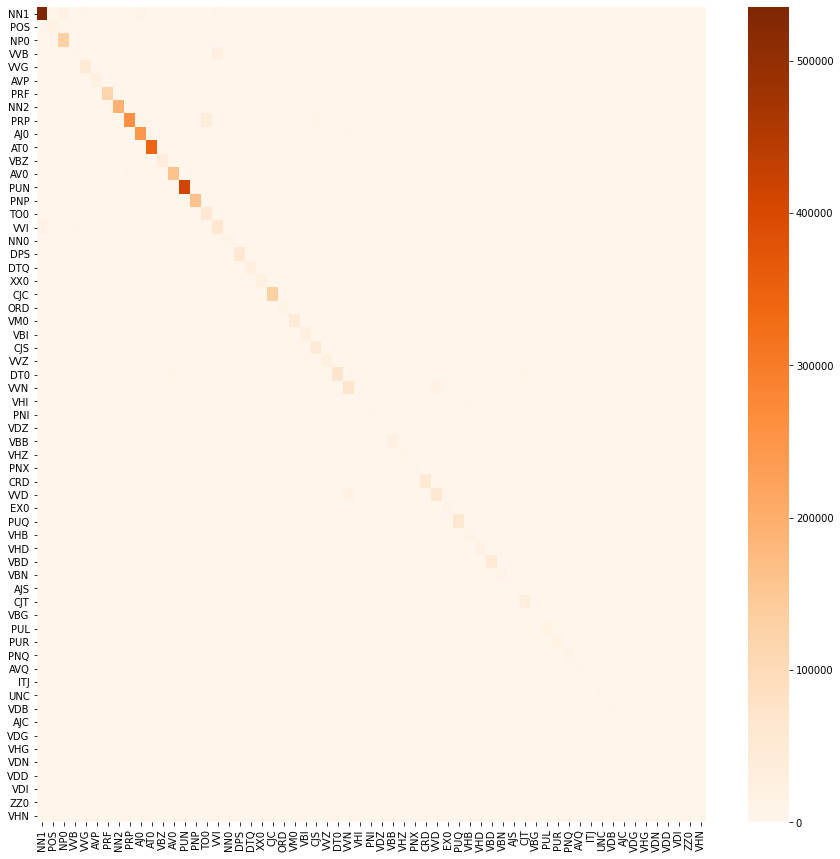

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
fig.set_facecolor('white')
mat=confusion_matrix(x,y,labels=[key for key in tag_freq])
sum=mat.sum()
print(mat.shape)
sns.heatmap(mat,ax=ax,yticklabels=[key for key in tag_freq],cmap='Oranges',xticklabels=[key for key in tag_freq])

In [ ]:
print("Accuracy is: ",np.trace(mat)/sum) #acc

Accuracy is:  0.920990725088704


## Bigram Tagger

In [ ]:
# 3d dictionary word - prev_tag - tag

In [ ]:
y=[]
x=[]
unknown=0;
default='NP0'
prev_word_exists=0
word_exists=0
for sent in test_dict_pos:
  word_tag_list=sent.split(' ')
  prev=''
  for word_tag in word_tag_list:
    if (len(word_tag)==0): # removing the case when the word_tag is ' '
      continue
    word,tag=word_tag.split('_')
    word=word.replace(' ','')
    tag=tag.replace(' ','')
    
    #if both the current word and prev_tag exists in the dictionary from the train data
    if (word in prev_tag_word and prev in prev_tag_word[word]):
      pred=max(prev_tag_word[word][prev],key=prev_tag_word[word][prev].get)
      prev_word_exists+=1
    # if the word exists but the word-prev_tag combo doesn't exists so we apply the unigram for that word
    elif (word in dataframe.index):
      pred=dataframe.loc[word].idxmax()
      word_exists+=1
    # if the word doesn't exists so we choose the default tag
    else:
      pred=default
      unknown+=1
    if (len(tag)>3):
        tag1,tag2=tag.split('-')
        tag=tag1
        if (tag2==pred):
          tag=tag2
    prev=tag
    y.append(pred)
    x.append(tag)

In [ ]:
print(unknown)
print(word_exists)
print(prev_word_exists)

55423
120491
3953829


(61, 61)


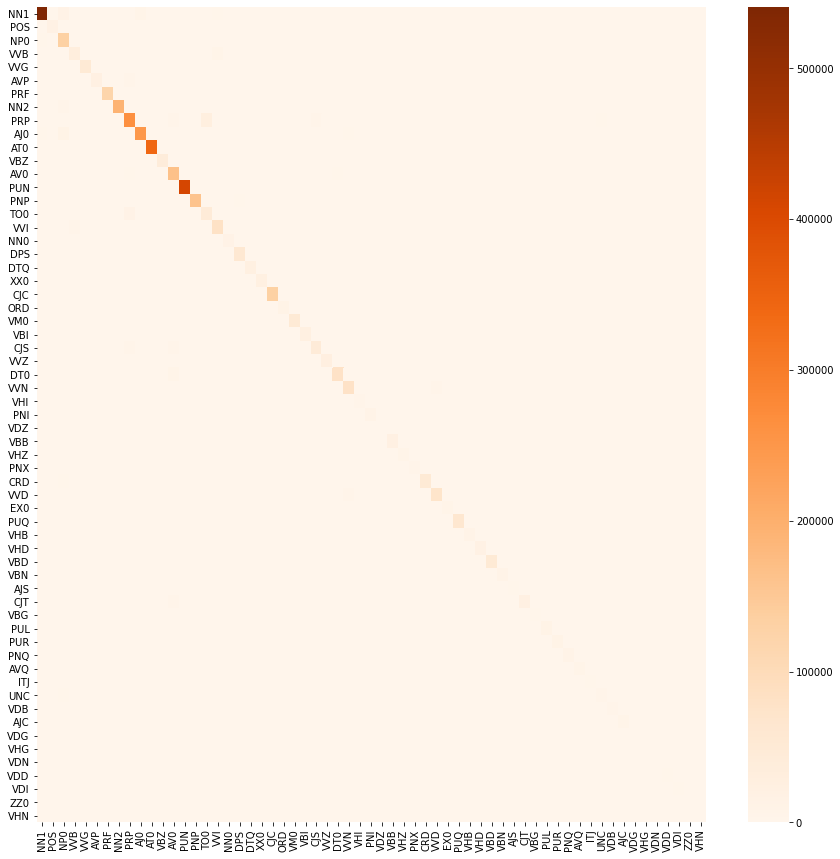

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
fig.set_facecolor('white')
mat=confusion_matrix(x,y,labels=[key for key in tag_freq])
sum=mat.sum()
print(mat.shape)
sns.heatmap(mat,ax=ax,yticklabels=[key for key in tag_freq],cmap='Oranges',xticklabels=[key for key in tag_freq])

In [ ]:
print("Accuracy is: ",np.trace(mat)/sum) #acc

Accuracy is:  0.9406185808656858


In [ ]:
print("Accuracy with bigram, p=0.9 : 0.9406185808656858")
print("Accuracy with bigram, p=0.75 : 0.9406265716777049")
print("Accuracy with bigram, p=0.5 : 0.9414857050426625")
print("Accuracy with unigram, p=0.9 : 0.920990725088704")
print("Accuracy with unigram, p=0.75 : 0.9210837090831075")
print("Accuracy with unigram, p=0.0.5 : 0.9211653122240294")

Accuracy with bigram, p=0.9 : 0.9406185808656858
Accuracy with bigram, p=0.75 : 0.9406265716777049
Accuracy with bigram, p=0.0.5 : 0.9414857050426625
Accuracy with unigram, p=0.9 : 0.920990725088704
Accuracy with unigram, p=0.75 : 0.9210837090831075
Accuracy with unigram, p=0.0.5 : 0.9211653122240294
